In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/gdrive/MyDrive/Kaggle'

In [ ]:
%cd gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d khsamaha/aviation-accident-database-synopses

Dataset URL: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses
License(s): CC0-1.0
  0% 0.00/4.99M [00:00<?, ?B/s]
100% 4.99M/4.99M [00:00<00:00, 85.7MB/s]


In [ ]:
!unzip aviation-accident-database-synopses.zip -d accidents

Archive:  aviation-accident-database-synopses.zip
  inflating: accidents/AviationData.csv  
  inflating: accidents/USState_Codes.csv  


In [ ]:
%cd accidents

/content/gdrive/MyDrive/Kaggle/accidents


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.cm as cm

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/accidents/AviationData.csv', encoding='latin1')
df.head(5)

<ipython-input-45-27e63cdf35c6>:2: DtypeWarning:

Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,37,-82,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
df.shape

(88889, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

5

In [ ]:
missing_percentages = (df.isna().sum().sort_values(ascending=False) / len(df))*100
missing_percentages

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

<Axes: >

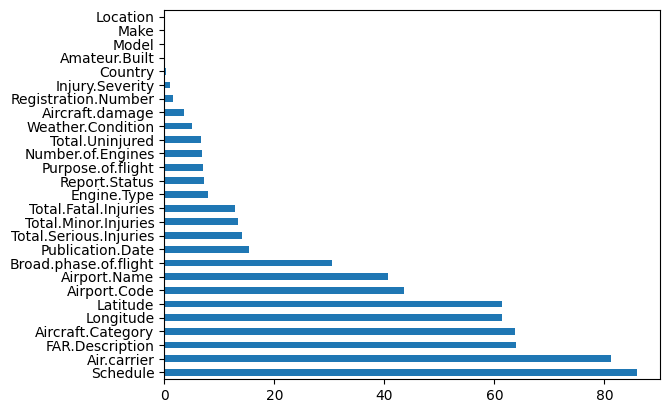

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Dropping the columns having more missing values

In [ ]:
thershold=0.3
missing_counts= df.isna().sum()
total_row= len(df)
drop_col= [i for i in df.columns if missing_counts[i]/total_row > thershold]
df.drop(columns=drop_col,inplace=True)
df.shape

(88889, 22)

In [ ]:
df2=df.copy()
df.drop('Publication.Date',axis=1,inplace=True)

In [ ]:
d={}
for i in df.columns:
    d[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= df.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79105,1382
9,Make,8238,63


# Dropping rows having more missing values

In [ ]:
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape

(63312, 21)

In [ ]:
df.isna().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                   15
Country                   198
Injury.Severity            11
Aircraft.damage             0
Registration.Number         0
Make                        8
Model                      23
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
dtype: int64

## Handeling Null values

In [ ]:
l2=['Location','Country','Injury.Severity','Model','Make']
for i in l2:
        df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause


In [ ]:
df['Make']=df['Make'].str.title()
df['Make'].replace('[!@#$%^&*()_+{}|:"<>,-./?`~=;0123456789]', '', regex=True, inplace=True)
len(df['Make'].unique())
df['Make']= df['Make'].str.strip()
len(df['Make'].unique())

5650

In [ ]:
def str_clean(row):
    parts = row.split(" ", 2)
    if len(parts) > 1:
        return parts[0]
    else:
        return row
df['Make']=df["Make"].apply(str_clean)

In [ ]:
df['Model'] = df['Model'].apply(lambda x: x.upper())
df['Model'] = df['Model'].str.replace('-', ' ')
df['Model'] = df['Model'].apply(str_clean)

In [ ]:
pd.set_option('display.max_columns', None)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause


In [ ]:
class AircraftAccidentVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize_top_10_models_by_make(self):
        top_10_makes = self.data['Make'].value_counts().head(10).index

        for make in top_10_makes:
            make_data = self.data[self.data['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()

    def visualize_weather(self):
        weather_counts = self.data['Weather.Condition'].value_counts()
        weather_counts.plot(kind='bar', title='Weather Conditions in Aircraft Accidents')
        plt.xlabel('Weather Conditions')
        plt.ylabel('Number of Accidents')
        plt.show()

    def visulize_engines(self):
        engine_weather_counts = self.data.groupby(['Engine.Type', 'Weather.Condition']).size().reset_index(name='Count')
        plt.figure(figsize=(20,12))
        sns.barplot(x= 'Engine.Type', y= 'Count',hue='Weather.Condition',data=engine_weather_counts)
        plt.xlabel('Type of Eng.')
        plt.ylabel('Count of Engine')
        plt.title('Count of Engine Types by Weather Condition')
        plt.legend(title='Weather Condition', loc='upper right')

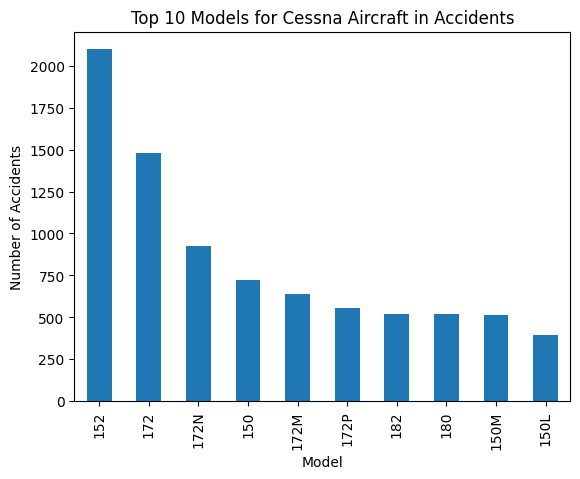

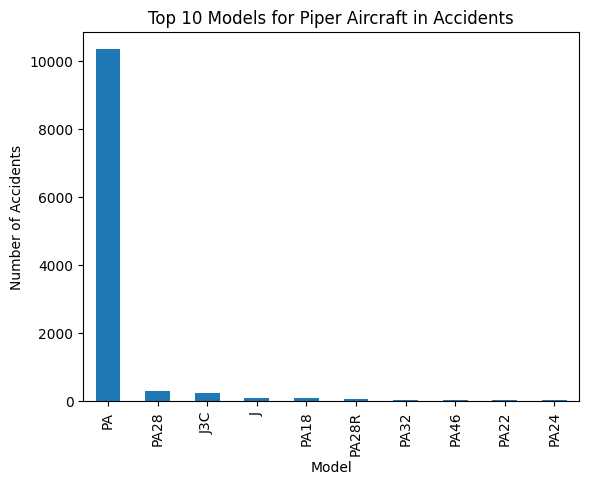

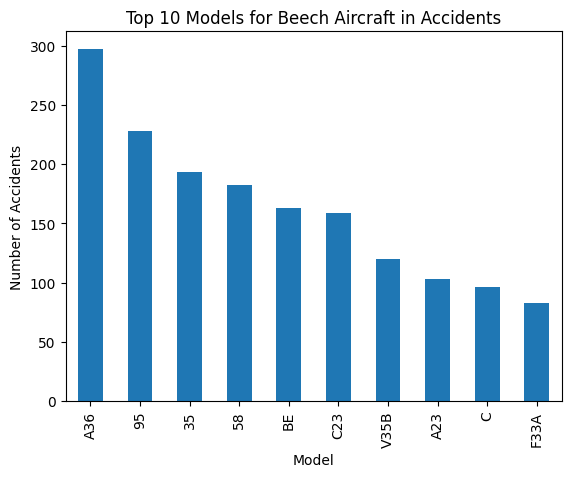

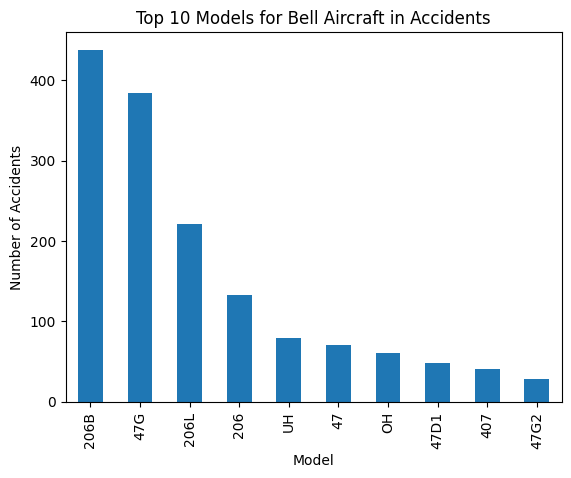

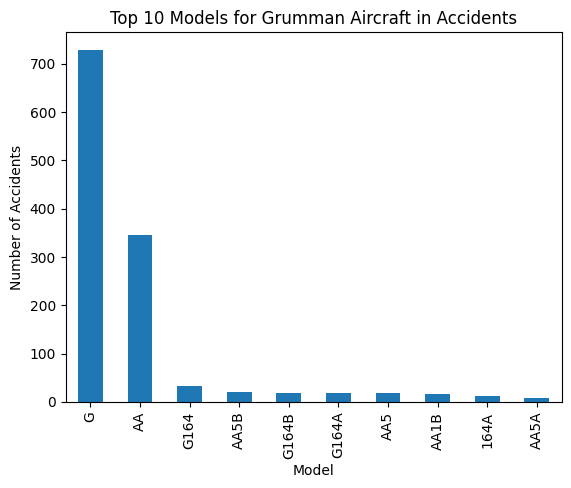

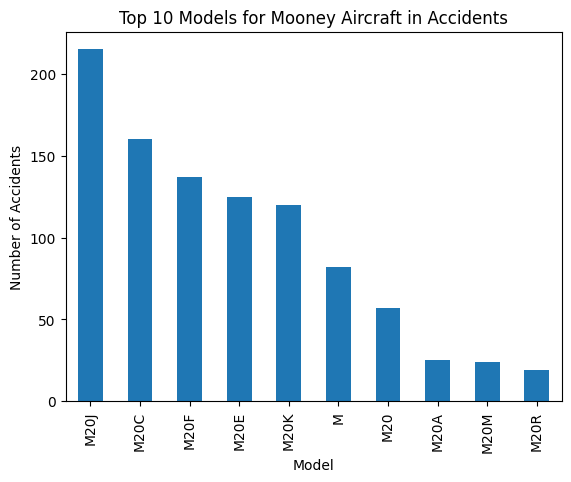

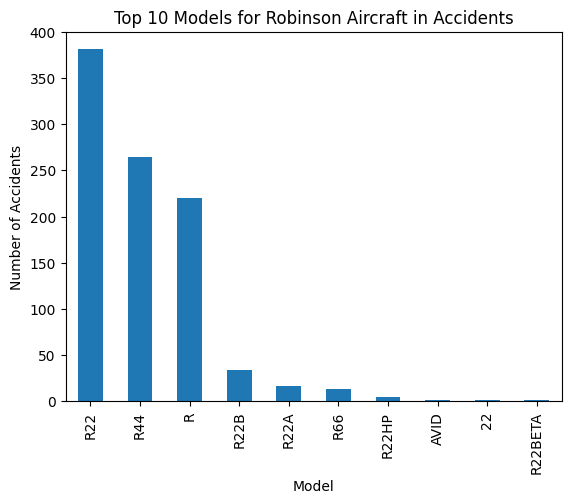

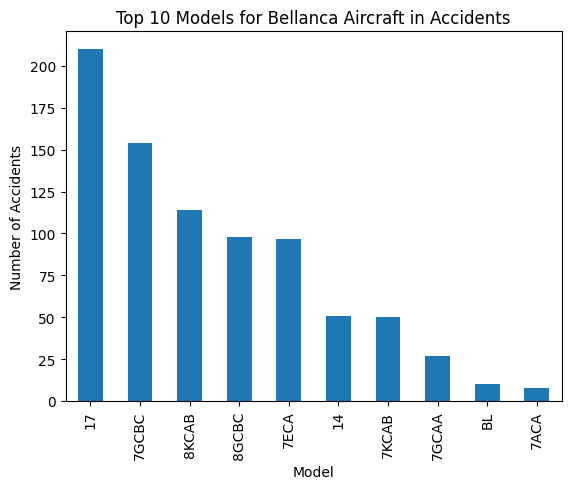

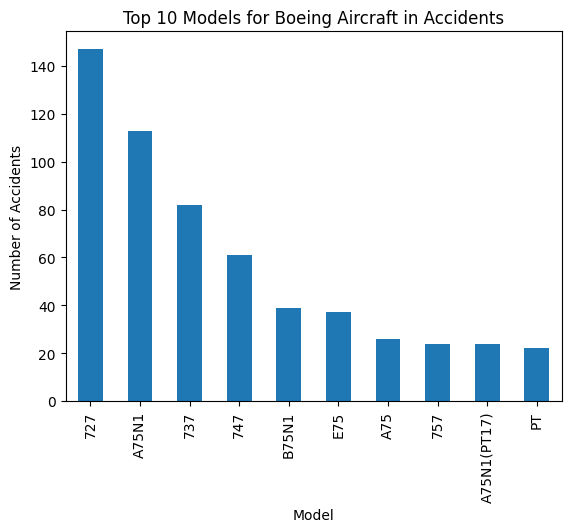

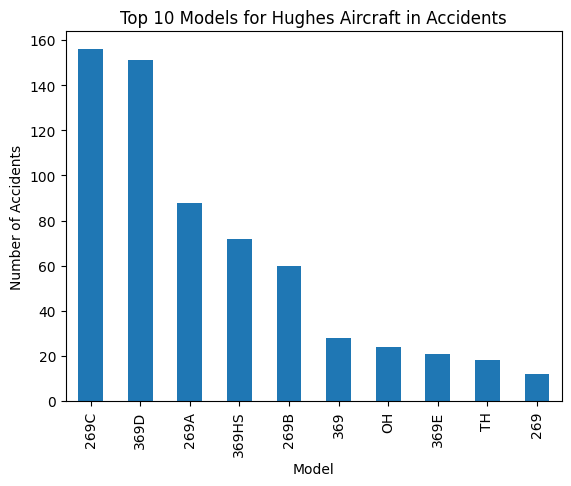

In [ ]:
visulizer= AircraftAccidentVisualizer(df)
visulizer.visualize_top_10_models_by_make()

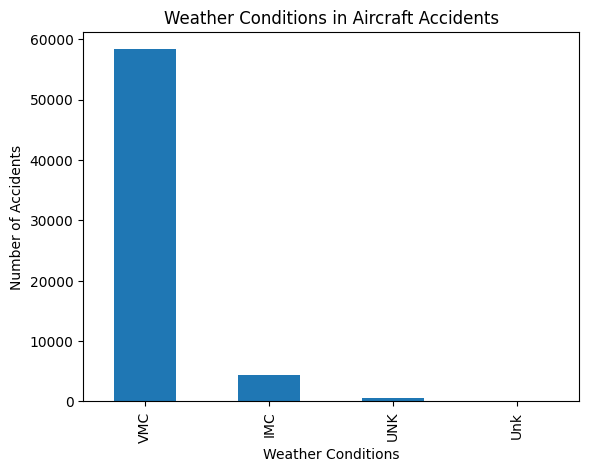

In [ ]:
visulizer.visualize_weather()

In [ ]:
unique_country = df['Country'].unique()
len(unique_country)

87

In [ ]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [ ]:
new_column_names = {'vent.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity',
                    'Aircraft.damage':'Damage_type', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df['Fatality'] = df['Injury_Severity'].str.extract(r'\((\d+)\)')
df['Fatality'].fillna(df['Injury_Severity'], inplace=True)
df['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)
df['Fatality'] = df.apply(lambda row: row['Fatal_Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)
df['Fatality'].replace('Unavailable', np.nan, inplace=True)
df['Fatality'][~df['Fatality'].isna()] = df['Fatality'][~df['Fatality'].isna()].astype(int)
pd.options.display.float_format = '{:.0f}'.format

<ipython-input-61-18c002384f01>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Month'] = df['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['Season'] = df['Month'].map(seasons)

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Country'].value_counts()

Country
United States                     62766
Bahamas                              88
Puerto Rico                          59
ATLANTIC OCEAN                       54
PACIFIC OCEAN                        35
                                  ...  
Cuba                                  1
French Guiana                         1
Federated States Of Micronesia        1
Nicaragua                             1
Obyan                                 1
Name: count, Length: 87, dtype: int64

In [ ]:
df_us = df_us = df[df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [ ]:
df_us = df_us.copy()

In [ ]:
valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable"
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)

In [ ]:
df_us['City'] = df_us['City'].str.rstrip(',')

In [ ]:
df_us.drop(columns=['Date', 'Location', 'Fatal_Injuries'], inplace=True)

In [ ]:
df_us['Fatality'] = pd.to_numeric(df_us['Fatality'], errors='coerce')

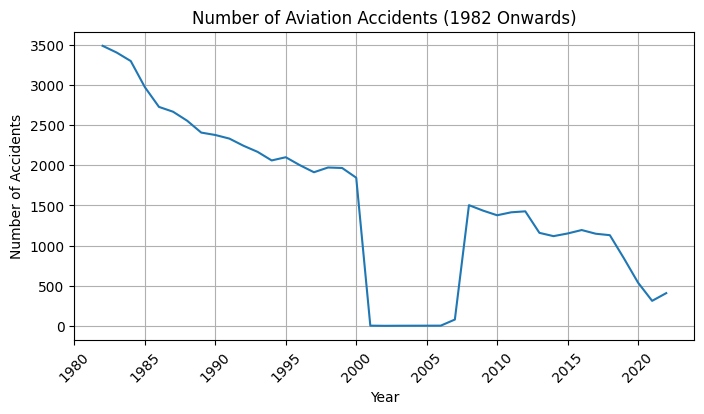

In [ ]:
df_us_filtered = df_us[df_us['Year'] >= 1982]

accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-72-84cea867d555>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



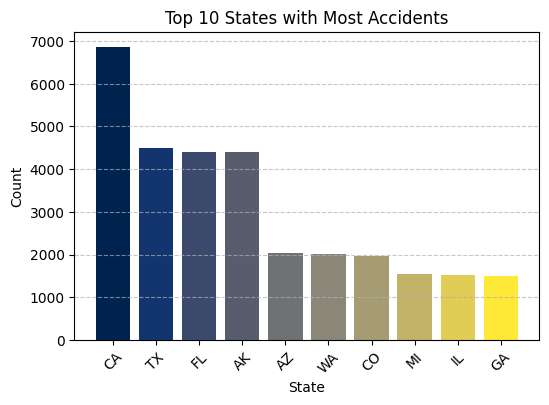

In [ ]:
top_10_states = df_us['State'].value_counts().head(10)


cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(range(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Top 10 states are similar in more recent years

<ipython-input-73-6a16783bbba4>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



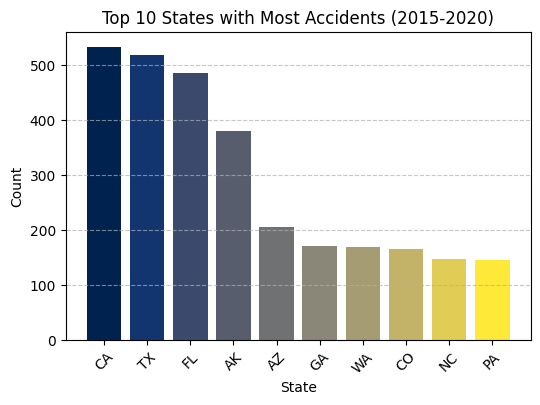

In [ ]:
filtered_years = df_us[(df_us['Year'] >= 2015) & (df_us['Year'] <= 2020)]


top_10_states = filtered_years['State'].value_counts().head(10)


cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(np.arange(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents (2015-2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Distribution of aviation accidents around the US

In [ ]:
state_counts = df_us['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of Aviation Accidents Around the US",
    color_continuous_scale= 'Reds',
)


fig.show()

## Plot distribution of accidents by months and seasons

<ipython-input-75-2f3a3c7be152>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




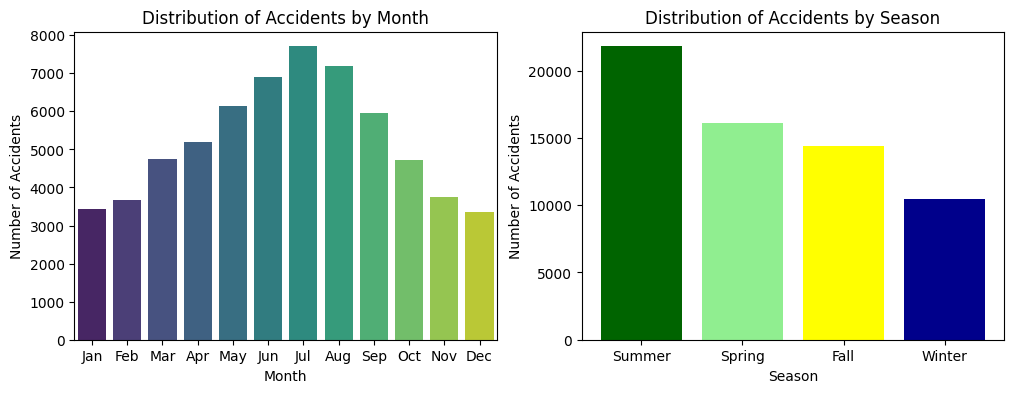

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df_us, x='Month', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'darkblue',
    'Spring': 'lightgreen',
    'Summer': 'darkgreen',
    'Fall': 'yellow'
}


seasonal_accident_counts = df_us['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'gray') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

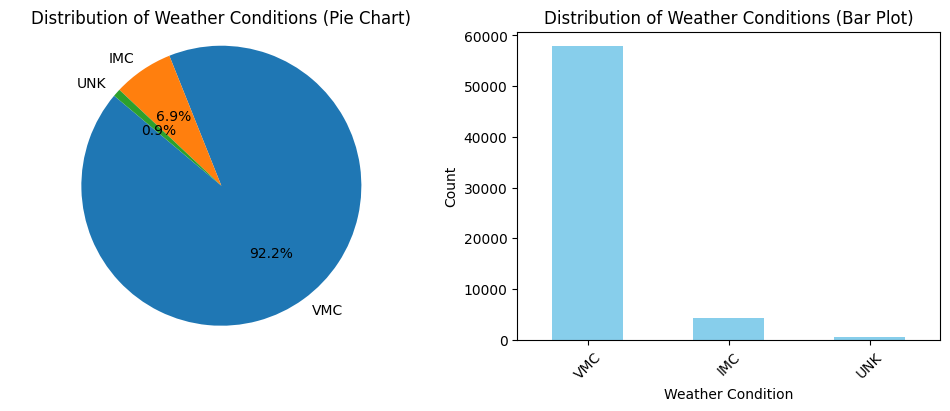

In [ ]:
df_us['Weather'] = df_us['Weather'].str.upper()


weather_counts_updated = df_us['Weather'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].pie(weather_counts_updated, labels=weather_counts_updated.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Weather Conditions (Pie Chart)')
axes[0].axis('equal')



weather_counts_updated.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Weather Conditions (Bar Plot)')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

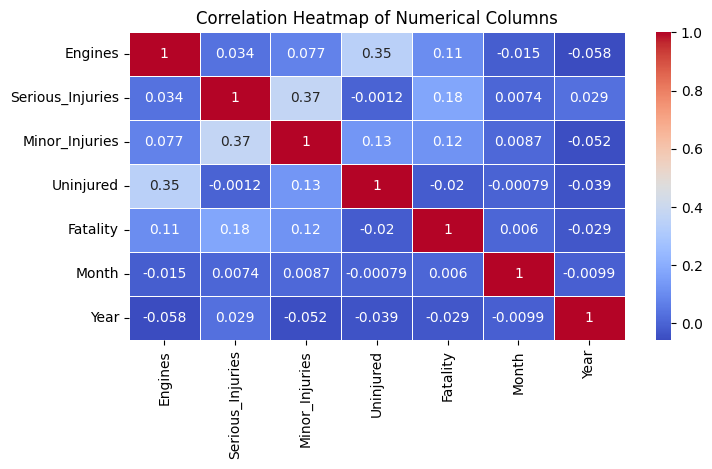

In [ ]:
numerical_data = df_us.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()